# Преобразование Фурье 2
### Kirill Zakharov
2021

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from dateutil.relativedelta import relativedelta

from math import *
from scipy.optimize import minimize
plt.style.use('ggplot')

Загрузим и отобразим данные об объемах пассажирских авиаперевозок.

In [2]:
passengers = pd.read_csv('passengers.csv', index_col='date', parse_dates=True)

In [3]:
passengers.head()

,num_passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


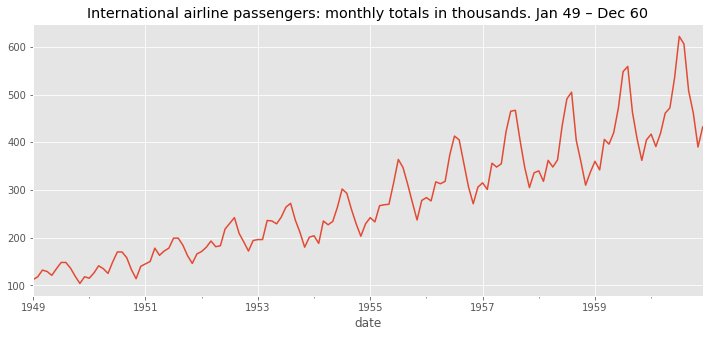

In [5]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

In [6]:
passengers['time'] = range(len(passengers))
passengers['sin'] = np.sin(2*pi*(passengers['time'].values-1)/12)
passengers['cos'] = np.cos(2*pi*(passengers['time'].values-1)/12)
passengers['const'] = 1

In [7]:
res = minimize(lambda x: ((passengers['num_passengers']-x[0]*passengers['time']*(x[1]*(x[4]+\
            passengers['sin'])+x[2]*(x[4]+passengers['cos']))*x[3]*passengers['const'])**2).mean(), (0.1,0.1,0.1,0.1,0.1))
coeff = res.x

In [8]:
coeff

array([ 1.08294514e-01,  3.74404834e+01, -3.70667064e+01,  1.09706469e-01,
        8.11117267e+02])

In [11]:
passengers['num_passengers']-coeff[0]*passengers['time']*(coeff[1]*(coeff[4]+\
                passengers['sin'])+coeff[2]*(coeff[4]+passengers['cos']))*coeff[3]*passengers['const']


date
1949-01-01    112.000000
1949-02-01    114.838447
1949-03-01    125.114081
1949-04-01    117.699114
1949-05-01    104.813026
                 ...    
1960-08-01     44.119926
1960-09-01    -18.525406
1960-10-01    -23.601976
1960-11-01    -58.309892
1960-12-01      3.497868
Length: 144, dtype: float64

In [14]:
passengers['approx'] = coeff[0]*passengers['time']*(coeff[1]*(coeff[4]+passengers['sin'])+\
                                            coeff[2]*(coeff[4]+passengers['cos']))*coeff[3]*passengers['const']

In [16]:
passengers.head()

,num_passengers,time,sin,cos,const,approx
date,,,,,,
1949-01-01,112,0,-0.500000,8.660254e-01,1,0.000000
1949-02-01,118,1,0.000000,1.000000e+00,1,3.161553
1949-03-01,132,2,0.500000,8.660254e-01,1,6.885919
1949-04-01,129,3,0.866025,5.000000e-01,1,11.300886
1949-05-01,121,4,1.000000,6.123234e-17,1,16.186974


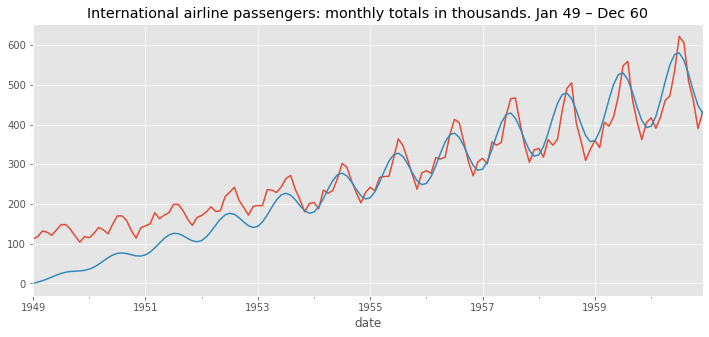

In [17]:
passengers['num_passengers'].plot(figsize=(12,5))
passengers['approx'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

### Прогноз на 3 года

In [18]:
predict = pd.DataFrame(passengers)

In [19]:
start = passengers.index[-1]
start = start + relativedelta(months=1)
new_index = pd.date_range(start=start, periods=36, freq='MS')

In [20]:
for i in range(len(new_index)):
    predict.loc[new_index[i]] = [0,0,0,0,0, coeff[0]*(len(passengers)+i)*(coeff[1]*(coeff[4]+np.sin(2*pi*(len(passengers)+i-1)/12))+coeff[2]*(coeff[4]+np.cos(2*pi*(len(passengers)+i-1)/12)))*coeff[3]]

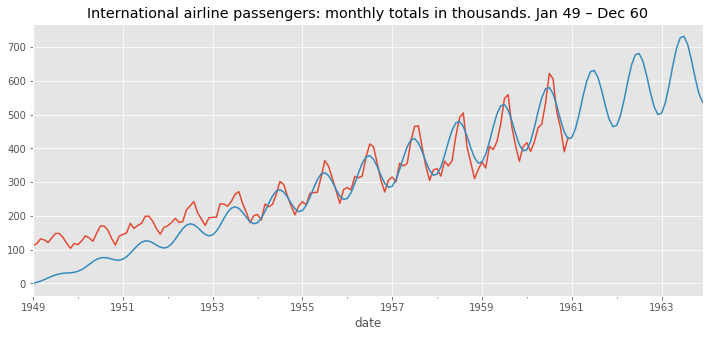

In [21]:
passengers['num_passengers'].plot(figsize=(12,5))
predict['approx'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

### Остатки

In [22]:
passengers['err'] = passengers['num_passengers']-passengers['approx']

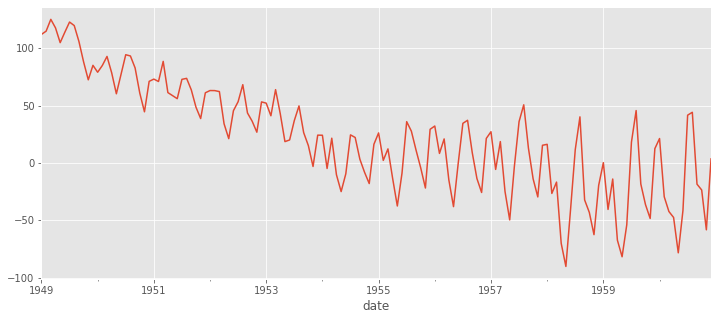

In [23]:
passengers['err'].plot(figsize=(12,5))
plt.show()